- 마스크 11픽셀 증가

In [ ]:
import numpy as np
from PIL import Image
from collections import deque
from glob import glob
from tqdm import tqdm

# Function to identify contiguous pixels and convert to array
def contiguous_pixels_to_array(img_array):
    visited = np.zeros_like(img_array, dtype=bool)
    arrays = []
    directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]

    def bfs(x, y, val):
        queue = deque([(x, y)])
        current_array = []
        while queue:
            cx, cy = queue.pop()
            if cx < 0 or cx >= img_array.shape[0] or cy < 0 or cy >= img_array.shape[1]:
                continue
            if visited[cx, cy] or img_array[cx, cy] != val:
                continue

            visited[cx, cy] = True
            current_array.append((cx, cy))
            for dx, dy in directions:
                nx, ny = cx + dx, cy + dy
                queue.append((nx, ny))
        return current_array

    for i in range(img_array.shape[0]):
        for j in range(img_array.shape[1]):
            if not visited[i, j]:
                current_array = bfs(i, j, img_array[i, j])
                if len(current_array) > 0:
                    arrays.append(current_array)

    return arrays

# Filter out contiguous regions that are less than min_size pixels long
def filter_large_regions(contiguous_arrays, min_size):
    return [region for region in contiguous_arrays if len(region) >= min_size]

In [ ]:
img_list = sorted(glob('./open/test_input/TEST_006.png')) # 6,16,36,44,
for Testimage in tqdm(img_list):
    # Load image
    img = Image.open(Testimage)

    # Convert image to grayscale
    img_gray = img.convert('L')

    # Convert grayscale image to numpy array
    img_array = np.array(img_gray)

    # Get arrays of contiguous pixels
    contiguous_arrays = contiguous_pixels_to_array(img_array)

    # Attempt to filter regions with decreasing min_size until some are found
    min_sizes = [1800, 750]
    good_regions = []
    for min_size in min_sizes:
        good_regions = filter_large_regions(contiguous_arrays, min_size)
        if good_regions:
            break

    # Create a binary image where contiguous regions of sufficient length are set to 1
    binary_image = np.zeros_like(img_array, dtype=np.uint8)

    for region in good_regions:
        for x, y in region:
            binary_image[x, y] = 1

    # Convert binary image to a PIL image
    binary_img = Image.fromarray((binary_image * 255).astype(np.uint8))

    # Save the binary image as a PNG file
    binary_img.save(f'./MASK_{Testimage.split("/")[-1]}')

100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


Output

In [ ]:
import numpy as np
from PIL import Image
from collections import deque
from glob import glob
from tqdm import tqdm
from scipy.ndimage import binary_dilation

# Function to identify contiguous pixels and convert to array
def contiguous_pixels_to_array(img_array):
    visited = np.zeros_like(img_array, dtype=bool)
    arrays = []
    directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]

    def bfs(x, y, val):
        queue = deque([(x, y)])
        current_array = []
        while queue:
            cx, cy = queue.pop()
            if cx < 0 or cx >= img_array.shape[0] or cy < 0 or cy >= img_array.shape[1]:
                continue
            if visited[cx, cy] or img_array[cx, cy] != val:
                continue

            visited[cx, cy] = True
            current_array.append((cx, cy))
            for dx, dy in directions:
                nx, ny = cx + dx, cy + dy
                queue.append((nx, ny))
        return current_array

    for i in range(img_array.shape[0]):
        for j in range(img_array.shape[1]):
            if not visited[i, j]:
                current_array = bfs(i, j, img_array[i, j])
                if len(current_array) > 0:
                    arrays.append(current_array)

    return arrays

# Filter out contiguous regions that are less than min_size pixels long
def filter_large_regions(contiguous_arrays, min_size):
    return [region for region in contiguous_arrays if len(region) >= min_size]

img_list = sorted(glob('./open/test_input/*.png')) # 6,16,36,44,
for Testimage in tqdm(img_list):
    # Load image
    img = Image.open(Testimage)

    # Convert image to grayscale
    img_gray = img.convert('L')

    # Convert grayscale image to numpy array
    img_array = np.array(img_gray)

    # Get arrays of contiguous pixels
    contiguous_arrays = contiguous_pixels_to_array(img_array)

    # Attempt to filter regions with decreasing min_size until some are found
    min_sizes = [1800, 750]
    good_regions = []
    for min_size in min_sizes:
        good_regions = filter_large_regions(contiguous_arrays, min_size)
        if good_regions:
            break

    # Create a binary image where contiguous regions of sufficient length are set to 1
    binary_image = np.zeros_like(img_array, dtype=np.uint8)

    for region in good_regions:
        for x, y in region:
            binary_image[x, y] = 1

    # Expand the regions by 10 pixels using binary dilation
    structure_element = np.ones((11, 11))  # Create a structuring element of size 21x21 (10 pixels on each side)
    expanded_binary_image = binary_dilation(binary_image, structure=structure_element).astype(np.uint8)

    # Convert expanded binary image to a PIL image
    expanded_binary_img = Image.fromarray((expanded_binary_image * 255).astype(np.uint8))

    # Save the expanded binary image as a PNG file
    expanded_binary_img.save(f'./exp_masked/EXPANDED_MASK_{Testimage.split("/")[-1]}')

100%|██████████| 100/100 [00:59<00:00,  1.67it/s]


In [ ]:
import shutil
# Compress the directory 'dir_name' into a zip file 'output_filename.zip'
shutil.make_archive('exp_masked', 'zip', './exp_masked')

'/home/sangho/ML/competition/image2024/exp_masked.zip'

- 마스크 불러오기(여기부터 실행)

In [1]:
# https://drive.google.com/file/d/1JvHXWu1v-5fKVwPtGIZe7YvdKxT4nRqh/view?usp=sharing

import gdown
id = '1JvHXWu1v-5fKVwPtGIZe7YvdKxT4nRqh'
gdown.download(id=id, quiet=False)

!mkdir -p /content/mask_dir
!unzip /content/exp_masked.zip -d /content/mask_dir

Downloading...
From: https://drive.google.com/uc?id=1JvHXWu1v-5fKVwPtGIZe7YvdKxT4nRqh
To: /content/exp_masked.zip
100%|██████████| 77.3k/77.3k [00:00<00:00, 55.5MB/s]


Archive:  /content/exp_masked.zip
  inflating: /content/mask_dir/EXPANDED_MASK_TEST_051.png  
  inflating: /content/mask_dir/EXPANDED_MASK_TEST_040.png  
  inflating: /content/mask_dir/EXPANDED_MASK_TEST_079.png  
  inflating: /content/mask_dir/EXPANDED_MASK_TEST_059.png  
  inflating: /content/mask_dir/EXPANDED_MASK_TEST_068.png  
  inflating: /content/mask_dir/EXPANDED_MASK_TEST_037.png  
  inflating: /content/mask_dir/EXPANDED_MASK_TEST_031.png  
  inflating: /content/mask_dir/EXPANDED_MASK_TEST_007.png  
  inflating: /content/mask_dir/EXPANDED_MASK_TEST_039.png  
  inflating: /content/mask_dir/EXPANDED_MASK_TEST_020.png  
  inflating: /content/mask_dir/EXPANDED_MASK_TEST_077.png  
  inflating: /content/mask_dir/EXPANDED_MASK_TEST_043.png  
  inflating: /content/mask_dir/EXPANDED_MASK_TEST_028.png  
  inflating: /content/mask_dir/EXPANDED_MASK_TEST_080.png  
  inflating: /content/mask_dir/EXPANDED_MASK_TEST_081.png  
  inflating: /content/mask_dir/EXPANDED_MASK_TEST_006.png  
  infl

- 0.49 결과 가져오기

In [2]:
# https://drive.google.com/file/d/1gdRCPApliEfqL1jfGzzj8Q26rU3DU1ab/view?usp=sharing
import gdown
id = '1gdRCPApliEfqL1jfGzzj8Q26rU3DU1ab'
gdown.download(id=id, quiet=False)

!mkdir -p /content/baseline_49
!unzip /content/baseline_49.zip -d ./baseline_49

Downloading...
From (original): https://drive.google.com/uc?id=1gdRCPApliEfqL1jfGzzj8Q26rU3DU1ab
From (redirected): https://drive.google.com/uc?id=1gdRCPApliEfqL1jfGzzj8Q26rU3DU1ab&confirm=t&uuid=e801c2e0-7ab4-4041-962d-87146bd7a9bc
To: /content/baseline_49.zip
100%|██████████| 46.5M/46.5M [00:01<00:00, 42.6MB/s]


Archive:  /content/baseline_49.zip
  inflating: ./baseline_49/TEST_000.png  
  inflating: ./baseline_49/TEST_001.png  
  inflating: ./baseline_49/TEST_002.png  
  inflating: ./baseline_49/TEST_003.png  
  inflating: ./baseline_49/TEST_004.png  
  inflating: ./baseline_49/TEST_005.png  
  inflating: ./baseline_49/TEST_006.png  
  inflating: ./baseline_49/TEST_007.png  
  inflating: ./baseline_49/TEST_008.png  
  inflating: ./baseline_49/TEST_009.png  
  inflating: ./baseline_49/TEST_010.png  
  inflating: ./baseline_49/TEST_011.png  
  inflating: ./baseline_49/TEST_012.png  
  inflating: ./baseline_49/TEST_013.png  
  inflating: ./baseline_49/TEST_014.png  
  inflating: ./baseline_49/TEST_015.png  
  inflating: ./baseline_49/TEST_016.png  
  inflating: ./baseline_49/TEST_017.png  
  inflating: ./baseline_49/TEST_018.png  
  inflating: ./baseline_49/TEST_019.png  
  inflating: ./baseline_49/TEST_020.png  
  inflating: ./baseline_49/TEST_021.png  
  inflating: ./baseline_49/TEST_022.png  

- LaMa기반 마스킹 복원

In [3]:
print('\n> Install dependencies')
# !pip install wldhx.yadisk-direct -q
!pip install --upgrade pip -q
!pip uninstall --yes --quiet osqp
!pip install -U scikit-survival -q
!pip uninstall kornia -y
!pip install kornia --no-dependencies -q
!pip install kornia-rs -q
!pip install pytorch-lightning -q
!pip install hydra-core==1.1.1 -q
!pip install webdataset -q
!pip install torch torchvision torchaudio torchtext -q
!pip install wget --quiet
!pip install albumentations==1.3.0 -q


> Install dependencies
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.4/899.4 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 28.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 57.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [4]:
!curl -LJO https://huggingface.co/smartywu/big-lama/resolve/main/big-lama.zip
!unzip /content/big-lama.zip

#@title Run this sell to set everything up
print('\n> Cloning the repo')
!git clone https://github.com/advimman/lama.git

!mkdir /content/output

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1173  100  1173    0     0   8165      0 --:--:-- --:--:-- --:--:--  8202
100  363M  100  363M    0     0   135M      0  0:00:02  0:00:02 --:--:--  137M
Archive:  /content/big-lama.zip
  inflating: big-lama/config.yaml    
  inflating: big-lama/models/best.ckpt  

> Cloning the repo
Cloning into 'lama'...
remote: Enumerating objects: 469, done.
remote: Counting objects: 100% (266/266), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 469 (delta 145), reused 109 (delta 108), pack-reused 203 (from 1)
Receiving objects: 100% (469/469), 8.83 MiB | 11.55 MiB/s, done.
Resolving deltas: 100% (186/186), done.


In [5]:
print('\n> Init mask-drawing code')
import base64, os
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode
from albumentations import DualIAATransform
import matplotlib.pyplot as plt
import numpy as np
import wget
from shutil import copyfile
import shutil
import cv2
from PIL import Image
import numpy as np
from glob import glob



> Init mask-drawing code


/content


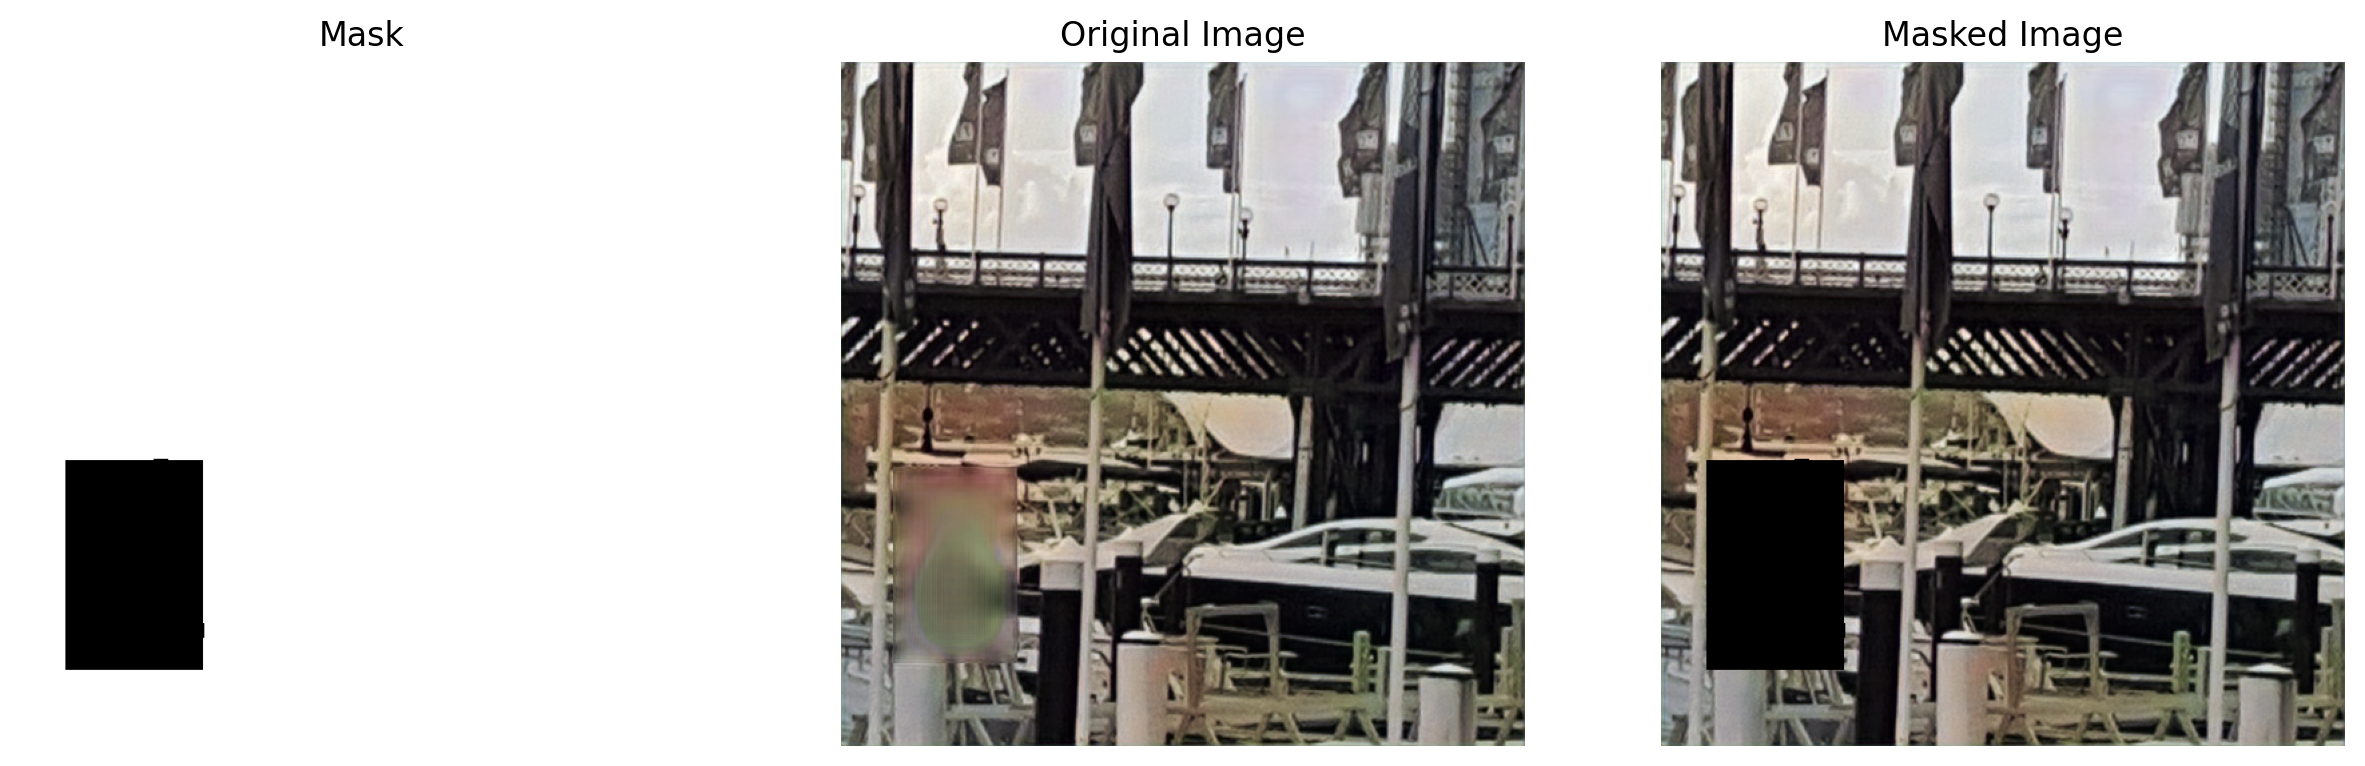

In [8]:
os.chdir("/content")
!PYTHONPATH=. TORCH_HOME=$(pwd)
!pwd

# Load the original image
# image_path = '/content/open/test_input/TEST_000.png'  # Replace with your image file path
image_path = '/content/baseline_49/TEST_031.png'
original_img = Image.open(image_path).convert('RGB')
img_array = np.array(original_img)

# Load the pre-generated mask image (ensure it's binary: 1 for mask, 0 for background)
mask_path = '/content/mask_dir/EXPANDED_MASK_TEST_031.png'  # Replace with your mask file path
mask_img = Image.open(mask_path).convert('L')
mask_array = np.array(mask_img) < 128  # Assuming your mask is a grayscale image

# Apply the mask to the original image
masked_img_array = img_array * mask_array[:, :, np.newaxis]

# Display results
plt.rcParams["figure.figsize"] = (15, 5)
plt.rcParams['figure.dpi'] = 200

plt.subplot(131)
plt.imshow(mask_array, cmap='gray')
plt.axis('off')
plt.title('Mask')

plt.subplot(132)
plt.imshow(img_array)
plt.axis('off')
plt.title('Original Image')


plt.subplot(133)
plt.imshow(masked_img_array)
plt.axis('off')
plt.title('Masked Image')

plt.show()

os.chdir("/content")


In [9]:
import os
from PIL import Image
import numpy as np
import glob
from natsort import natsorted  # 자연스러운 정렬을 위해 natsort 사용
import shutil

# 디렉토리가 존재하면 내부 파일 삭제 후 진행
lama_input_dir = './lama_input'

# 이미지를 저장할 디렉토리 확인 후 생성
lama_input_dir = '/content/lama_input'
if not os.path.exists(lama_input_dir):
    os.makedirs(lama_input_dir)


# 이미지 및 마스크 파일 경로 오름차순 정렬 (숫자 순서 고려)
# image_paths = natsorted(glob.glob('/content/open/test_input/*.png'))
image_paths = natsorted(glob.glob('/content/baseline_49/*.png'))
mask_paths = natsorted(glob.glob('/content/mask_dir/*.png'))

# 반복문으로 각 이미지에 대해 마스크를 적용
for idx, (image_path, mask_path) in enumerate(zip(image_paths, mask_paths)):

    # 파일명 추출 및 가공
    f_name = os.path.basename(image_path)  # 경로에서 파일명 추출
    file_name = f_name.split('.')[0]       # 확장자 제거

    # 원본 이미지 로드
    original_img = Image.open(image_path).convert('RGB')
    img_array = np.array(original_img)

    # 미리 생성된 마스크 이미지 로드 (이진 마스크: 마스크는 1, 배경은 0)
    mask_img = Image.open(mask_path).convert('L')
    mask_array = np.array(mask_img) < 128  # 그레이스케일 이미지로 처리

    # 이미지와 마스크를 파일 이름에 맞게 저장
    original_img.save(os.path.join(lama_input_dir, f'{file_name}.png'))  # RGB로 저장
    mask_img.save(os.path.join(lama_input_dir, f'{file_name}_mask.png'))  # 그레이스케일로 저장

import os
os.chdir("/content/lama")

!PYTHONPATH=. TORCH_HOME=$(pwd)
!pwd

!PYTHONPATH=. TORCH_HOME=$(pwd) python3 bin/predict.py model.path=/content/big-lama indir=/content/lama_input outdir=/content/restored_image dataset.img_suffix=.png > /dev/null



/content/lama
/content/lama/saicinpainting/training/trainers/__init__.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=map_location

In [10]:
import os
import shutil
from google.colab import files

# 결과가 저장된 디렉토리 경로
output_dir = '/content/restored_image'
renamed_dir = '/content/renamed_images'

# 새 디렉토리 생성 (기존 파일 보호)
os.makedirs(renamed_dir, exist_ok=True)

# 파일 이름 변경 (_mask 제거)
for filename in os.listdir(output_dir):
    old_path = os.path.join(output_dir, filename)
    if os.path.isfile(old_path):
        # 새로운 파일 이름 지정 (_mask 제거)
        new_filename = filename.replace('_mask', '')
        new_path = os.path.join(renamed_dir, new_filename)
        shutil.copy(old_path, new_path)  # 원본 파일 복사 후 이름 변경

# ZIP 파일 생성
zip_file_name = '/content/restored_base49.zip'
shutil.make_archive(zip_file_name.replace('.zip', ''), 'zip', renamed_dir)

# 압축된 ZIP 파일 경로 출력
print(f"Download your result from: {zip_file_name}")

# 다운로드 링크 생성
files.download(zip_file_name)


Download your result from: /content/renamed_images.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>